In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 7]

In [2]:
confirmed = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
deaths = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [4]:
recovered = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [5]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
confirmed.drop(['Lat', 'Long'], axis=1, inplace=True)

In [7]:
recovered.drop(['Lat', 'Long'], axis=1, inplace=True)

In [8]:
deaths.drop(['Lat', 'Long'], axis=1, inplace=True)

In [9]:
recovered.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [10]:
confirmed.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [11]:
deaths.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [12]:
confirmed[~confirmed['province'].isnull()].country.value_counts()

US                116
Mainland China     31
Australia           8
Canada              4
Macau               1
Taiwan              1
Others              1
Hong Kong           1
Name: country, dtype: int64

In [13]:
df = confirmed.copy()

In [14]:
df_uc = df[((df.country == 'Mainland China') |  (df.country == 'US'))]

In [15]:
df_no_uc = df[~((df.country == 'Mainland China') |  (df.country == 'US'))]

In [16]:
df_uc[~df_uc['province'].isnull()].country.value_counts()

US                116
Mainland China     31
Name: country, dtype: int64

In [17]:
df_united = df_no_uc.groupby('country').sum()

In [54]:
import datetime
from dateutil.parser import parse as parse_date

In [55]:
def removeSome(df):
    df = df.copy()
    df = df[~df.country.str.contains('Others')]
    df_no_uc = df[~((df.country == 'Mainland China') |  (df.country == 'US'))]
    df_united = df_no_uc.groupby('country').sum()
    df_united.index.rename('place', inplace=True)
    df_uc = df[((df.country == 'Mainland China') |  (df.country == 'US'))]
    df_uc = df_uc[~df_uc.province.str.contains('Diamond Princess')]
    df_uc['place'] = df_uc['country'] + '/' + df_uc.province.apply(lambda x: x.split(', ')[-1])
    df_uc.drop(['province', 'country'], axis=1, inplace=True)
    df_uc.set_index('place', inplace=True)
    ret = pd.concat([df_united, df_uc])
    ret.columns = [parse_date(x) for x in ret.columns]
    return ret
con = removeSome(confirmed)
rec = removeSome(recovered)
dea = removeSome(deaths)

In [56]:
con[con.index.str.contains('China')]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09
place,,,,,,,,,,,,,,,,,,,,,
Mainland China/Anhui,1,9,15,39,60,70,106,152,200,237,...,990,990,990,990,990,990,990,990,990,990
Mainland China/Beijing,14,22,36,41,68,80,91,111,114,139,...,411,413,414,414,418,418,422,426,428,428
Mainland China/Chongqing,6,9,27,57,75,110,132,147,182,211,...,576,576,576,576,576,576,576,576,576,576
Mainland China/Fujian,1,5,10,18,35,59,80,84,101,120,...,296,296,296,296,296,296,296,296,296,296
Mainland China/Gansu,0,2,2,4,7,14,19,24,26,29,...,91,91,91,91,91,102,119,120,124,124
Mainland China/Guangdong,26,32,53,78,111,151,207,277,354,436,...,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352
Mainland China/Guangxi,2,5,23,23,36,46,51,58,78,87,...,252,252,252,252,252,252,252,252,252,252
Mainland China/Guizhou,1,3,3,4,5,7,9,9,12,29,...,146,146,146,146,146,146,146,146,146,146
Mainland China/Hainan,4,5,8,19,22,33,40,43,46,52,...,168,168,168,168,168,168,168,168,168,168


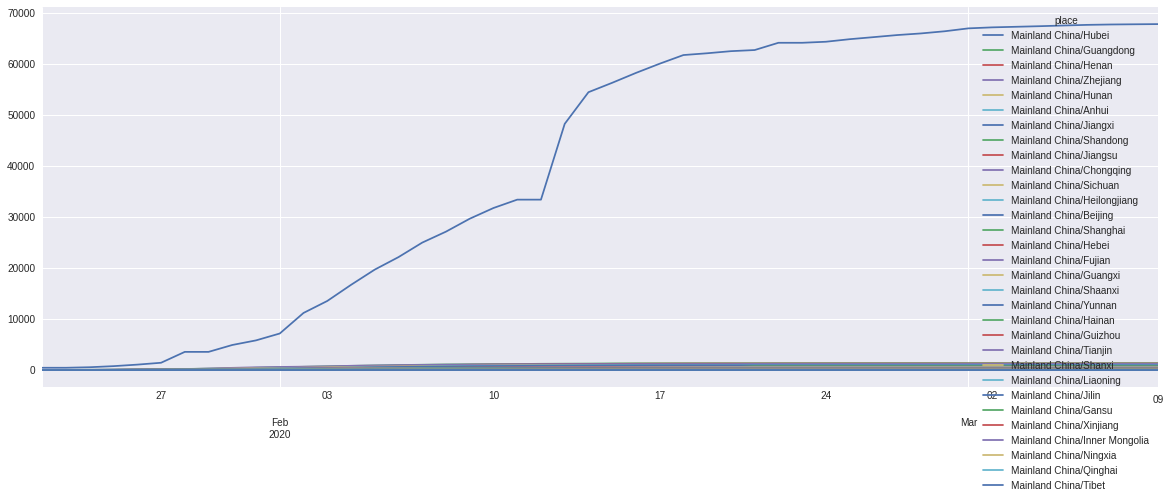

In [57]:
con[con.index.str.contains('China')].sort_values('3/1/20', ascending=False).T.plot()

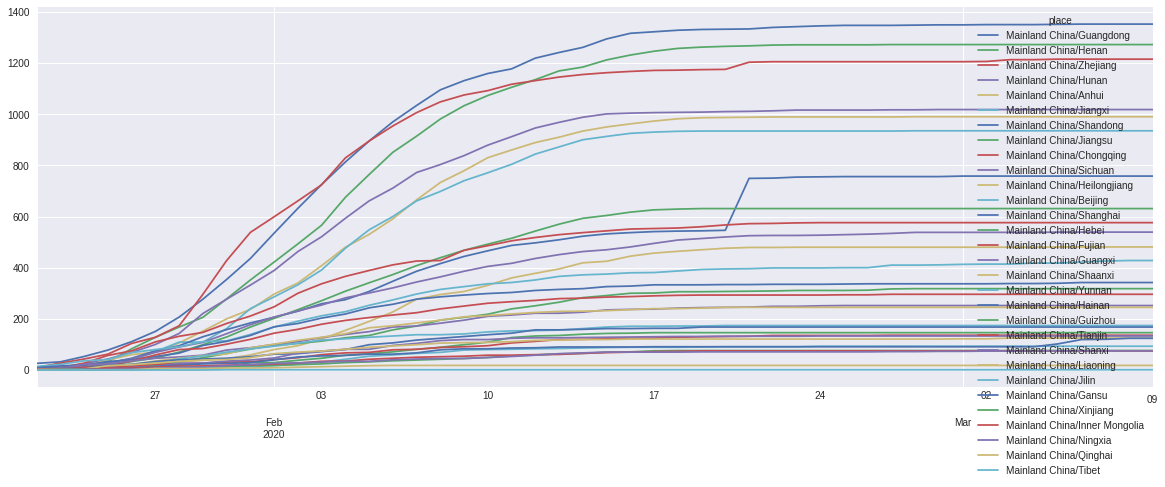

In [58]:
con[con.index.str.contains('China') & (~con.index.str.contains('Hubei'))].sort_values('3/1/20', ascending=False).T.plot()

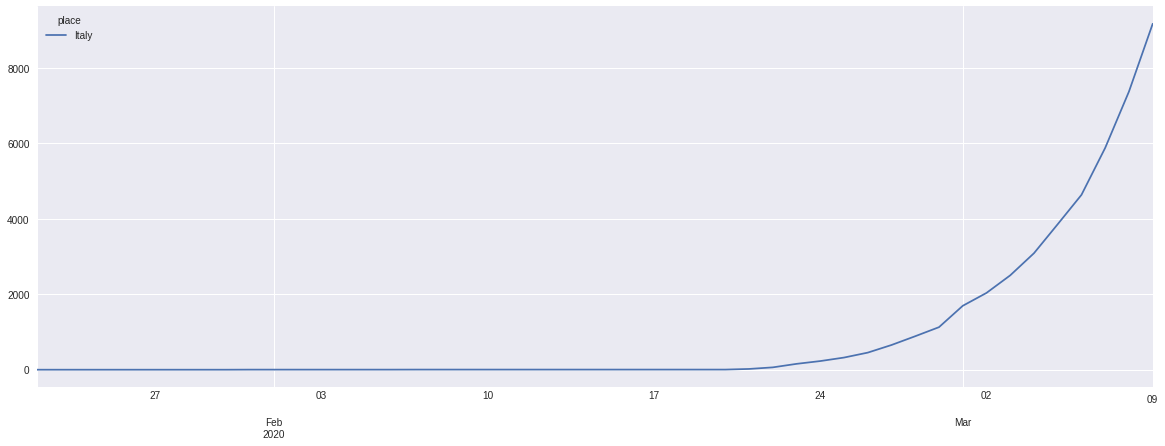

In [59]:
con[con.index.str.contains('Italy')].sort_values('3/1/20', ascending=False).T.plot()

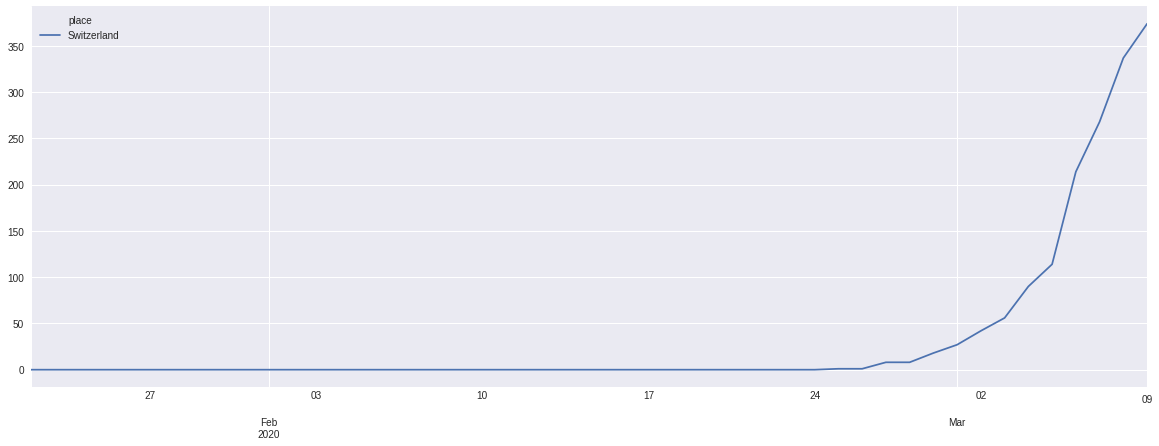

In [60]:
con[con.index.str.contains('Switzerland')].sort_values('3/1/20', ascending=False).T.plot()

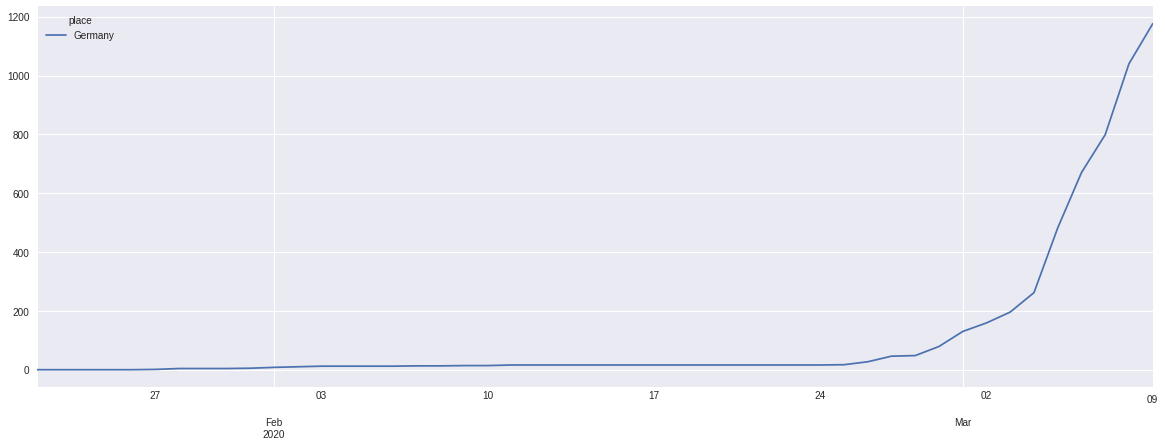

In [61]:
con[con.index.str.contains('Germany')].sort_values('3/1/20', ascending=False).T.plot()

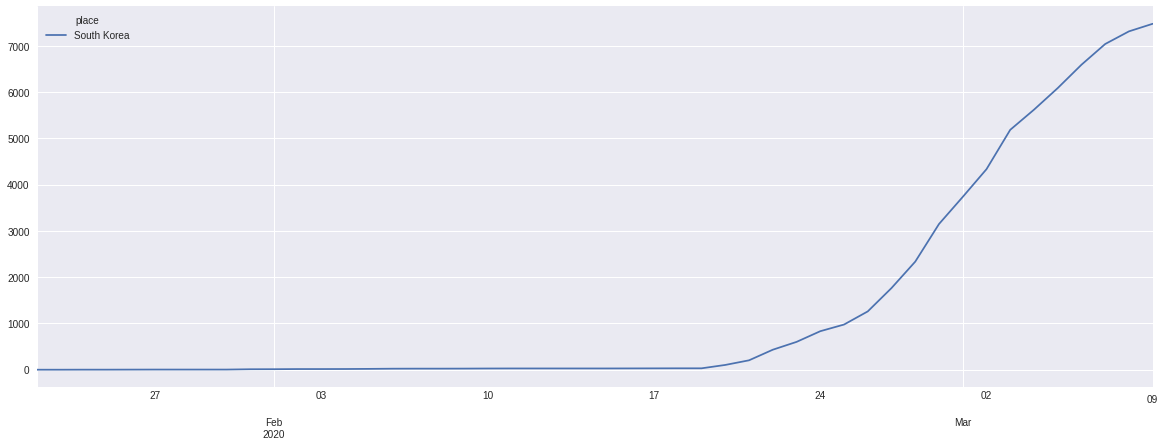

In [62]:
con[con.index.str.contains('Korea')].sort_values('3/1/20', ascending=False).T.plot()

In [63]:
dea[dea.index.str.contains('Korea')][dea.columns[:-10]]


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28
place,,,,,,,,,,,,,,,,,,,,,
South Korea,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,6,8,10,12,13,13


In [64]:
rec[dea.index.str.contains('Korea')]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09
place,,,,,,,,,,,,,,,,,,,,,
South Korea,0,0,0,0,0,0,0,0,0,0,...,27,30,30,30,41,41,135,135,118,118


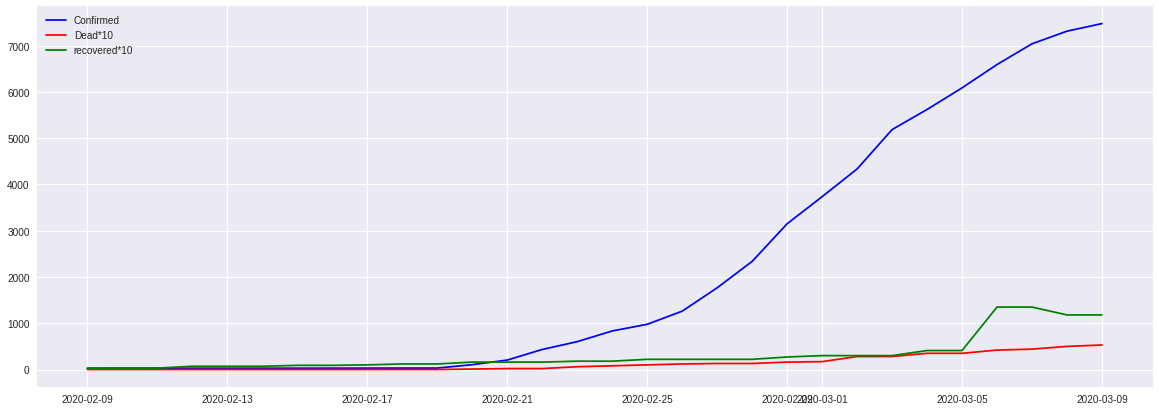

In [74]:
def plotRatio(country, days):
    fig, ax = plt.subplots()
    ax.plot(con[con.index.str.contains(country)][con.columns[-days:]].T, color='blue', label='Confirmed')
    ax.plot((dea[dea.index.str.contains(country)][con.columns[-days:]]*10).T, color='red', label='Dead*10')
    ax.plot((rec[rec.index.str.contains(country)][con.columns[-days:]]*10).T, color='green', label='recovered*10')
    ax.legend()
plotRatio('Korea', 30)

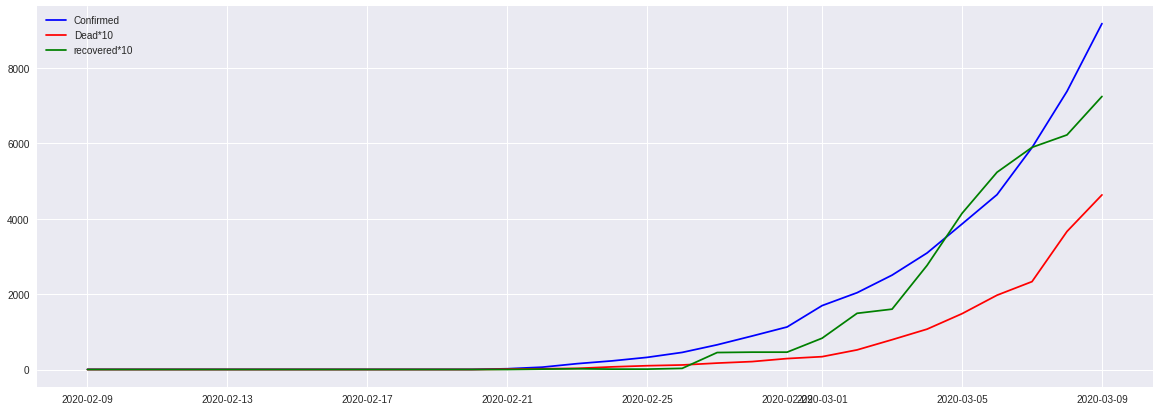

In [75]:
plotRatio('Italy', 30)

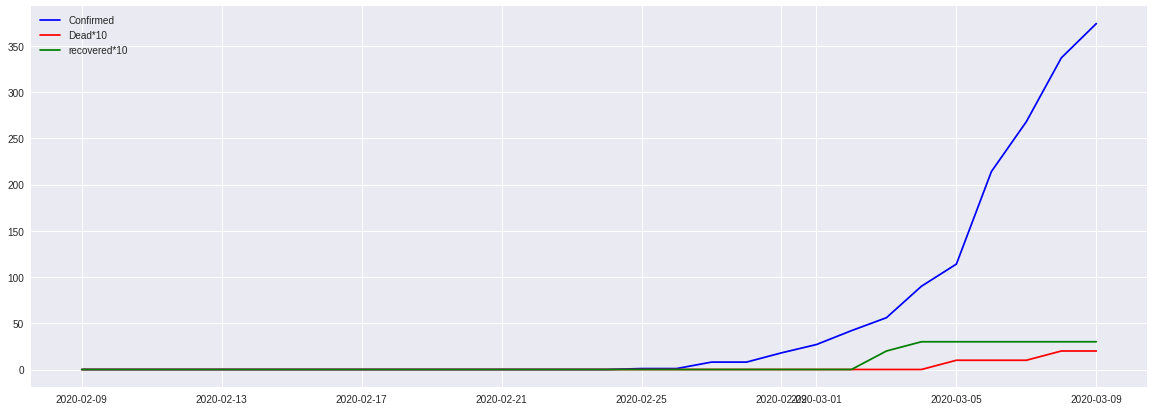

In [77]:
plotRatio('Switzerland', 30)

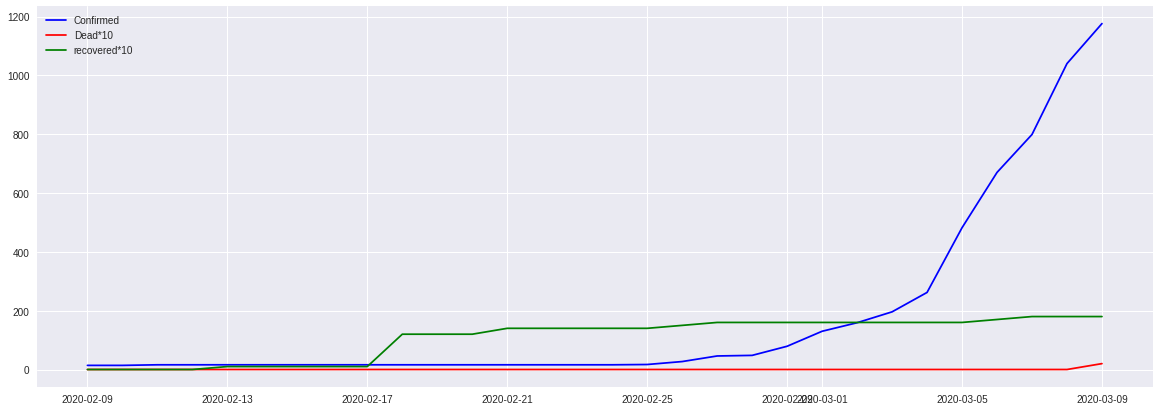

In [78]:
plotRatio('Germany', 30)

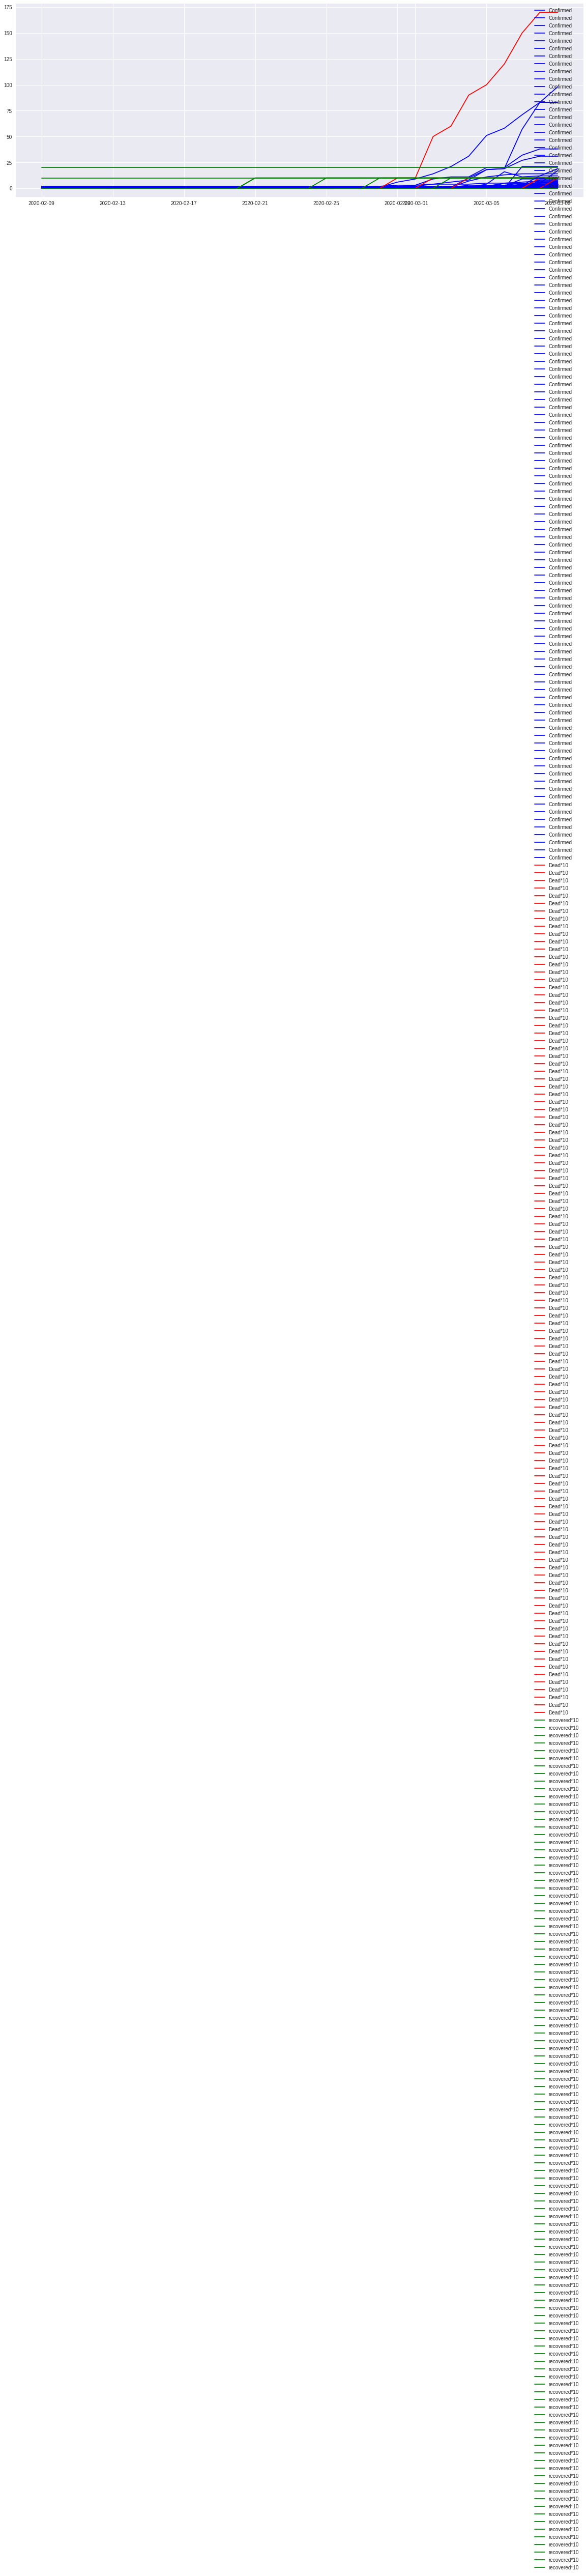